<a href="https://colab.research.google.com/github/Zackthinji/zenith-org/blob/main/Retail_Sales_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Retail Sales Analysis and Visualization**



## **Step 1: Install Required Libraries**

In [8]:
!pip install pandas matplotlib seaborn openpyxl


## **Upload the File**

In [10]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
for file_name in uploaded.keys():
    df = pd.read_excel(file_name)
    print(f"Loaded file: {file_name}")

# Display the first few rows of the DataFrame
df.head()


Saving Sample - Superstore.xls to Sample - Superstore (2).xls
Loaded file: Sample - Superstore (2).xls


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##**Import Necessary Libraries**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


## **Create and Download Visualizations**

### **1. Sales by Category and Sub-Category**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

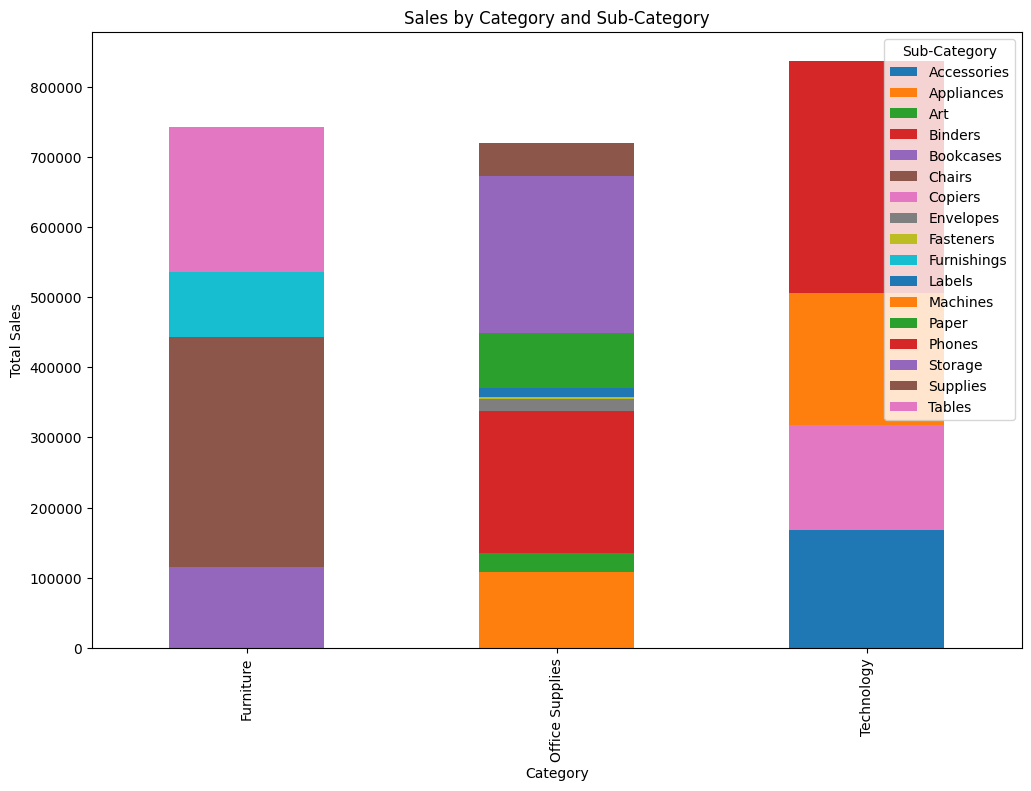

In [12]:
# Group by Category and Sub-Category and sum the Sales
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack()

# Plot the data
category_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Save and download the plot
plt.savefig('/content/sales_by_category.png')
files.download('/content/sales_by_category.png')


### **2. Profit by Region**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

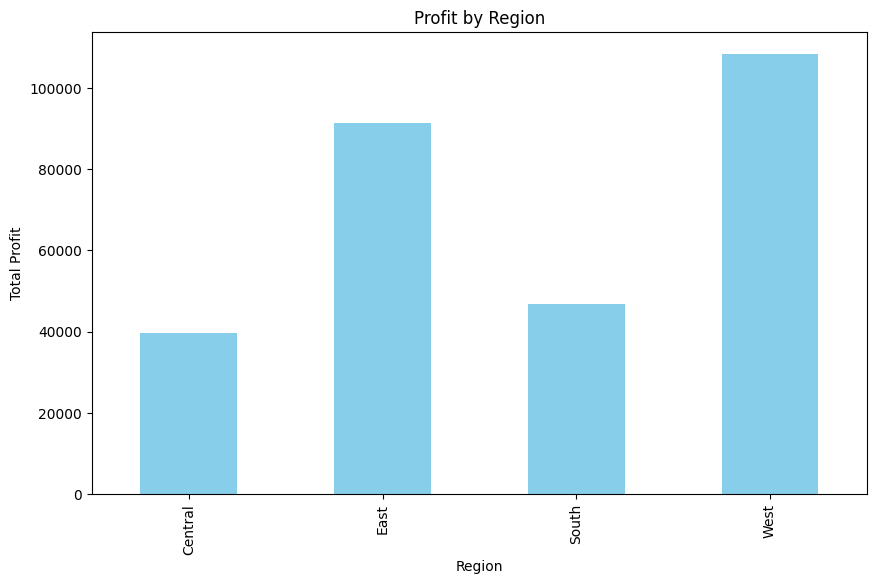

In [13]:
# Group by Region and sum the Profit
region_profit = df.groupby('Region')['Profit'].sum()

# Plot the data
region_profit.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')

# Save and download the plot
plt.savefig('/content/profit_by_region.png')
files.download('/content/profit_by_region.png')


### **3. Sales vs. Profit Scatter Plot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

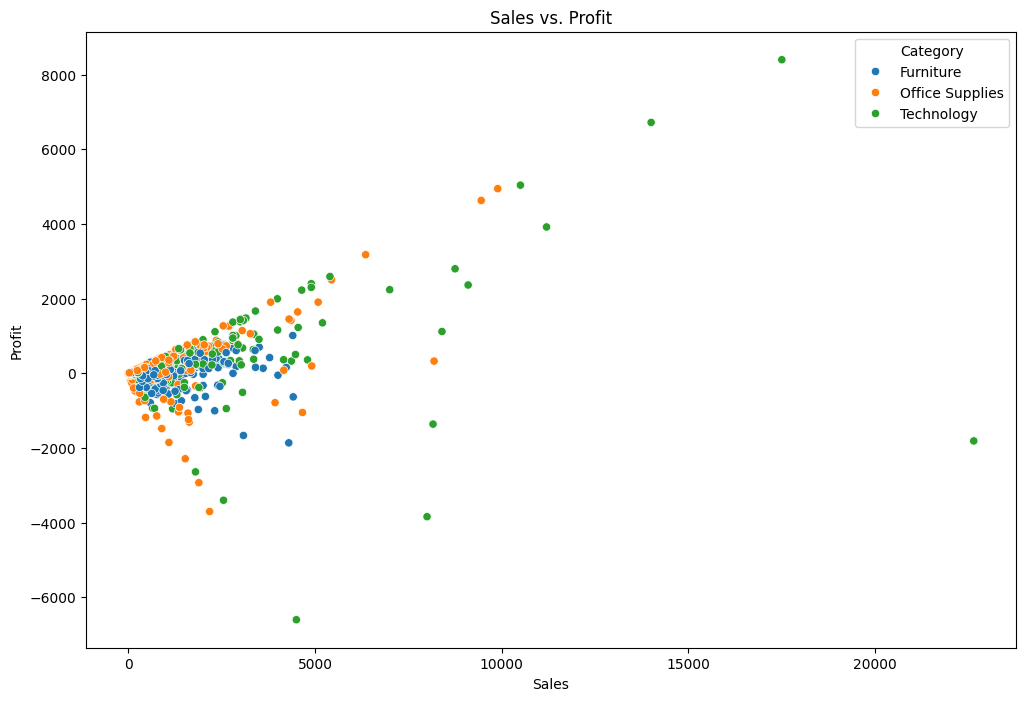

In [14]:
# Scatter plot of Sales vs. Profit
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Save and download the plot
plt.savefig('/content/sales_vs_profit.png')
files.download('/content/sales_vs_profit.png')


### **4. Monthly Sales Trend**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

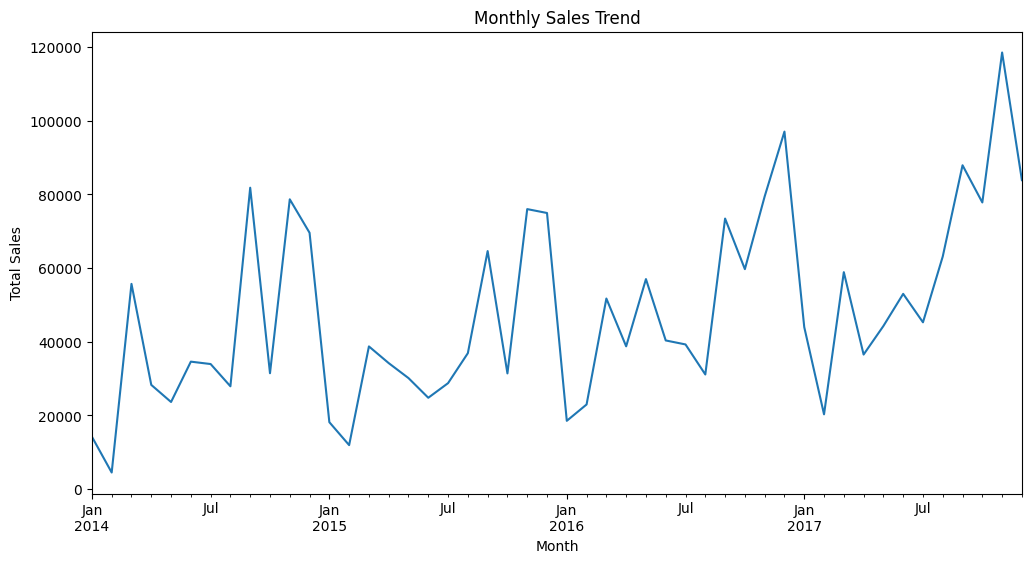

In [15]:
# Convert Order Date to datetime and extract year and month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Group by Year-Month and sum the Sales
monthly_sales = df.groupby('Year-Month')['Sales'].sum()

# Plot the data
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Save and download the plot
plt.savefig('/content/monthly_sales_trend.png')
files.download('/content/monthly_sales_trend.png')


### **5. Top 10 Customers by Sales**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

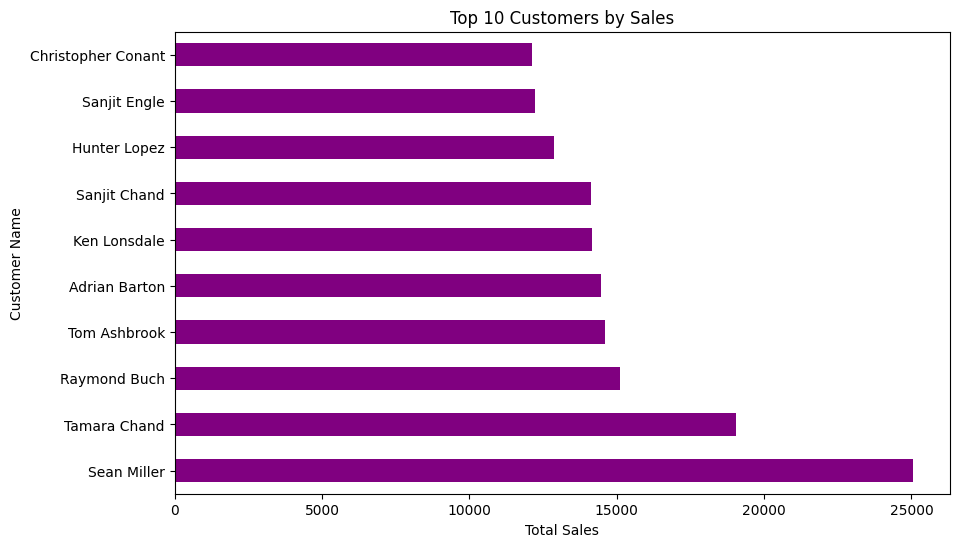

In [16]:
# Group by Customer Name and sum the Sales
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)

# Plot the data
top_customers.plot(kind='barh', color='purple', figsize=(10, 6))
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')

# Save and download the plot
plt.savefig('/content/top_10_customers.png')
files.download('/content/top_10_customers.png')
